📌 Caso de Uso: Asistente Inteligente para Orientación en Universidades y Becas en Perú



🔎 1. Ingesta de Datos

El sistema recopilaría información de fuentes oficiales como:

📄 Ministerio de Educación (Minedu) → Carreras y universidades licenciadas.

📄 SUNEDU → Ranking de universidades, acreditación.

📄 Pronabec → Becas disponibles, requisitos, fechas de postulación.

📄 INEI → Estadísticas de empleabilidad y salarios por carrera.

📄 Universidades e institutos → Costos de matrículas y pensiones.


## Intesta de datos

### SUNEDU → Ranking de universidades, acreditación.

In [2]:
from unstructured.partition.html import partition_html

In [9]:
# URL de la página con la tabla
urls_sunedu = "https://www.sunedu.gob.pe/lista-de-universidades-licenciadas/"

elements_sunedu= partition_html(url=urls_sunedu,
                                 ssl_verify=False,
                                    chunking_strategy="by_title" #significa que el HTML se dividirá en partes basadas en los títulos (encabezados como <h1>, <h2>, etc.).
                                   )


c:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\env_tuto_rag_s7\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.sunedu.gob.pe'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [10]:
elements_sunedu

In [5]:
# Obtenemos los distintos elementos de la particion
set([str(type(el)) for el in elements_sunedu])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.TableChunk'>"}

In [6]:
elements_sunedu[2].text

'Universidad Nacional Pedro Ruiz Gallo 09-06-2023 Resolución / Más información Lambayeque/Lambayeque Pública Universidad Nacional San Luis Gonzaga 15-01-2022 Resolución / Más información Ica/Ica Pública Universidad Autónoma de Ica 13-06-2020 Resolución / Más información Ica/Chincha Privada Facultad de Teología Pontificia y Civil de Lima 14-03-2020 Resolución / Más información Lima/Lima Privada Universidad Nacional Federico Villarreal 11-03-2020 Resolución / Más información Lima/Lima Pública'

### Pronabec → Becas disponibles, requisitos, fechas de postulación.

In [11]:
## Archivos pdf
folder_path =r"C:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\data\pronabec"

In [12]:
import os
from unstructured.partition.pdf import partition_pdf


# Inicializar una lista para almacenar los elementos extraídos de todos los PDFs
elements_pronabec = []

# Iterar sobre cada archivo en la carpeta especificada
for filename in os.listdir(folder_path):
    if filename.lower().endswith('.pdf'):  # Verificar que el archivo sea un PDF
        file_path = os.path.join(folder_path, filename)  # Obtener la ruta completa del archivo
        
        # Particionar el PDF para extraer elementos
        elements_pdf = partition_pdf(
            filename=file_path,
            infer_table_structure=True,            # Intenta detectar y estructurar tablas
            strategy="hi_res",                     # Usa alta resolución para mejorar la detección de tablas (obligatorio)
            extract_image_block_types=["Table","Image"],   # Extrae imágenes de las tablas en el PDF
            extract_image_block_to_payload=True,   # Convierte las imágenes extraídas a formato base64 para uso en APIs
            chunking_strategy="by_title",          # Divide el contenido basándose en los títulos del PDF
            max_characters=2000,                  # Máximo de caracteres por fragmento (por defecto es 500)
            combine_text_under_n_chars=500,       # Une fragmentos de texto si tienen menos de 2000 caracteres
        )
        
        # Agregar los elementos extraídos a la lista principal
        elements_pronabec.extend(elements_pdf)


c:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\env_tuto_rag_s7\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
elements_pronabec

In [14]:
set([str(type(el)) for el in elements_pronabec])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.Table'>",
 "<class 'unstructured.documents.elements.TableChunk'>"}

## 📄 INEI → Estadísticas de empleabilidad y salarios por carrera.


In [15]:
url_inei = "https://ponteencarrera.minedu.gob.pe/pec-portal-web/inicio/como-va-el-empleo"

elements_inei = partition_html(url=url_inei,
                                ssl_verify=False,
                                chunking_strategy="by_title")


c:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\env_tuto_rag_s7\lib\site-packages\urllib3\connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ponteencarrera.minedu.gob.pe'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [16]:
set([str(type(el)) for el in elements_inei])

{"<class 'unstructured.documents.elements.CompositeElement'>",
 "<class 'unstructured.documents.elements.TableChunk'>"}

## 📄 Universidades e institutos → Costos de matrículas y pensiones.

In [17]:
# Ruta del archivo PDF que se va a procesar
file_path_univ_institu = r"C:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\data\universidad_institutos\univ_institutos.pdf"

elements_univ_institu = partition_pdf(
    filename=file_path_univ_institu,
    infer_table_structure=True,            # Intenta detectar y estructurar tablas dentro del PDF
    strategy="hi_res",                     # Usa alta resolución para mejorar la detección de tablas (obligatorio)
    extract_image_block_types=["Image"],   # Extrae imágenes en el PDF (cambia "Table" por "Image" si se necesitan imágenes en general)
    extract_image_block_to_payload=True,   # Convierte las imágenes extraídas en base64 para uso en APIs
    chunking_strategy="by_title",          # Divide el contenido en fragmentos basados en los títulos del PDF
    max_characters=10000,                  # Máximo de caracteres por fragmento (por defecto es 500)
    combine_text_under_n_chars=2000,       # Une fragmentos de texto si tienen menos de 2000 caracteres
    new_after_n_chars=6000,                # Inicia un nuevo fragmento después de 6000 caracteres

    # extract_images_in_pdf=True,          # Parámetro obsoleto, ya no se usa
)

In [18]:
elements_univ_institu

In [21]:
elements_univ_institu[3].metadata.orig_elements

In [22]:
elements = elements_univ_institu[0].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '7d04c45b-aeb6-45b5-b882-1110f329c5be',
 'text': 'Centros de apoyo v GUIA DE COLEGIOS Nido particulares y nidos A ee ere www.guiadecolegios.pe Vacaciones utiles',
 'metadata': {'coordinates': {'points': ((349.8327054236367,
     140.21916082420142),
    (349.8327054236367, 258.2539759060839),
    (1306.321678903261, 258.2539759060839),
    (1306.321678903261, 140.21916082420142)),
   'system': 'PixelSpace',
   'layout_width': 1653,
   'layout_height': 2339},
  'last_modified': '2025-02-07T23:48:56',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAB2A7wDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NT

## Podcast de Youtube

In [23]:
import os
import uuid
from langchain.schema import Document  
from openai import OpenAI


client = OpenAI()


In [24]:
# 🔹 Path to your folder containing audio files
audio_folder = r"C:\Users\LuisFernandoSolísNav\Documents\datapath\rag_datapath_sesion_7\data\podcasts"


In [25]:


#  Lista para almacenar las transcripciones como objetos Document
documents_podcast = []
id_key = "doc_id"  # Clave para identificar cada documento

# Iterar sobre todos los archivos MP3 en la carpeta
for filename in os.listdir(audio_folder):
    if filename.endswith(".mp3"):  # Procesar solo archivos con extensión .mp3
        audio_path = os.path.join(audio_folder, filename)  # Obtener la ruta completa del archivo

        print(f" Transcribiendo: {filename}...")

        # 🔹 Abrir el archivo de audio
        with open(audio_path, "rb") as audio_file:
            transcription = client.audio.transcriptions.create(
                model="whisper-1",  # Modelo de transcripción de OpenAI (Whisper)
                file=audio_file      # Archivo de audio a transcribir
            )

        # Generar un ID único para el documento
        doc_id = str(uuid.uuid4())

        # 🔹 Almacenar la transcripción en un objeto Document
        doc = Document(
            page_content=transcription.text,  # Texto transcrito
            metadata={
                id_key: doc_id,  # ID único del documento
                "filename": filename,  # Nombre del archivo de audio
                "url": f"file://{audio_path}"  # Ruta local del archivo
            }
        )

        # Agregar el documento a la lista
        documents_podcast.append(doc)

        print(f" Completado: {filename} | ID: {doc_id}")

# 🔹 Imprimir todos los objetos Document almacenados
for doc in documents_podcast:
    print(f" Document ID: {doc.metadata[id_key]}")
    print(f"Transcripción:\n{doc.page_content}\n")


 Transcribiendo: ¿Cómo funciona la BECA PRONABEC  Jose Patiño explica su BECA en UNMSM  Todo Good - NDG Podcast - Todo Good Clips.mp3...
 Completado: ¿Cómo funciona la BECA PRONABEC  Jose Patiño explica su BECA en UNMSM  Todo Good - NDG Podcast - Todo Good Clips.mp3 | ID: 4df3e026-47f5-48c9-8cf3-9e780e6a61bc
 Transcribiendo: ¿Qué es Beca Perú - Pronabec - Minedu.mp3...
 Completado: ¿Qué es Beca Perú - Pronabec - Minedu.mp3 | ID: feb802a6-c75e-4a50-9303-d7383b9477b4
 Document ID: 4df3e026-47f5-48c9-8cf3-9e780e6a61bc
Transcripción:
Vimos que estás becado. Estoy becado por Prunavec, sí. ¿Y cómo fue, cómo te trajiste la cuenta, cómo funciona esta beca, cómo la conseguiste? Sí, cuando yo ingresé a la universidad en 2019, yo había escuchado de la beca permanencia, que es como beca 18, pero la beca permanencia está dirigida únicamente a estudiantes de universidades públicas, con necesidades. Entonces yo dije, pucha, o sea, no es para mí, esa beca debe ser para la gente que vive en La Puna, qu

### SEPARAR LOS ELEMENTOS EXTRAIDOS EN TEXTO, TABLAS, E IMAGENES

In [26]:
elements_sunedu

In [27]:
# separate tables from texts from sunedu
tables_sunedu = []
texts_sunedu = []

for chunk in elements_sunedu:
    if "Table" in str(type(chunk)):
        tables_sunedu.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts_sunedu.append(chunk)

In [28]:
# separate tables from texts from pronabec
tables_pronabec = []
texts_pronabec = []

for chunk in elements_pronabec:
    if "Table" in str(type(chunk)):
        tables_pronabec.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts_pronabec.append(chunk)

In [30]:
tables_pronabec

In [31]:
# separar tablas y textos de INEI
tables_inei = []
texts_inei = []

for chunk in elements_inei:
    if "Table" in str(type(chunk)):
        tables_inei.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts_inei.append(chunk)

In [33]:
tables_inei

In [34]:
# separar tablas y texto de Univ_e_insti
tables_univ_insti = []
texts_univ_insti = []

for chunk in elements_univ_institu:
    if "Table" in str(type(chunk)):
        tables_univ_insti.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts_univ_insti.append(chunk)

In [36]:
tables_univ_insti

[]

In [37]:
## Unimos los textos y las tablas

all_text = texts_sunedu + texts_pronabec + texts_inei + texts_univ_insti
all_tables =tables_sunedu + tables_pronabec + tables_inei + tables_univ_insti

In [39]:
all_tables

# Obtener las imágenes de los objetos CompositeElement


In [40]:
elements_pronabec

In [41]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if "CompositeElement" in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if "Image" in str(type(el)):
                    if el.metadata.image_base64:
                        images_b64.append(el.metadata.image_base64)
    return images_b64

images_sunedu = get_images_base64(elements_sunedu)
images_pronabec = get_images_base64(elements_pronabec)
images_inei = get_images_base64(elements_inei)
images_univ_insti = get_images_base64(elements_univ_institu)

In [42]:
all_images = images_sunedu + images_pronabec+ images_inei +images_univ_insti
all_images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAD+BEADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikJG

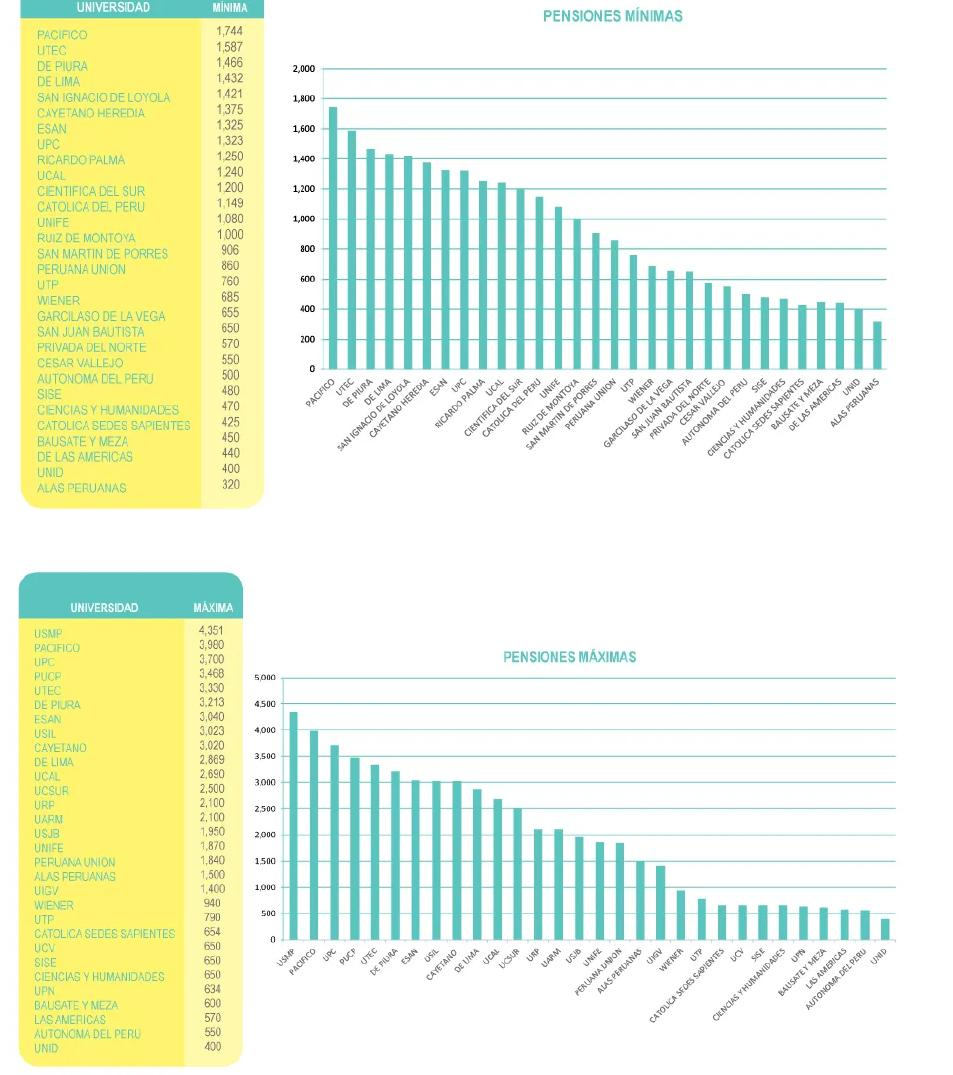

In [49]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(all_images[9])

## Resumir los datos

Crea un resumen de cada elemento extraído del PDF. Este resumen será vectorizado y utilizado en el proceso de recuperación.


In [50]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai.chat_models import ChatOpenAI

In [51]:
# Prompt
prompt_text = """
Eres un asistente encargado de resumir tablas y textos.
Proporciona un resumen conciso de la tabla o del texto.

Responde solo con el resumen, sin comentarios adicionales.
No empieces tu mensaje diciendo "Aquí tienes un resumen" o algo similar.
Simplemente da el resumen tal como es.

Fragmento de tabla o texto: {element}

"""

prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
model = ChatOpenAI(temperature=0.5, model="gpt-4")
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [54]:
all_text

In [55]:
all_text = all_text[0:10]
all_text

In [56]:
# Summarize text
text_summaries = summarize_chain.batch(all_text, {"max_concurrency": 2})

In [57]:
text_summaries

['Hasta el 02/01/2025, se han otorgado licencias a 98 universidades.',
 'La tabla proporciona información sobre dos escuelas de posgrado licenciadas: la Escuela de Posgrado Newman S.A.C y la Escuela De Posgrado-Gerens S.A.C., ambas de gestión privada, ubicadas en Tacna y Lima respectivamente. También se menciona la existencia de una lista de universidades a las que se les ha denegado la licencia, sin proporcionar más detalles. Finalmente, se invita a conocer más sobre los avances de las universidades en el proceso de licenciamiento.',
 'La información proporciona detalles sobre el proceso de cese de actividades, incluyendo cómo contactar al centro a través de una línea telefónica que opera de lunes a viernes de 08:30 a.m. a 04:30 p.m. La dirección física se encuentra en Calle Aldabas N° 337, Urb. Las Gardenias en Santiago de Surco, Lima. También se puede ubicar a la organización en los centros MAC.',
 'La información proporcionada enumera varias sedes ubicadas en diferentes regiones de

In [59]:
len(all_tables)

60

In [60]:
all_tables_2 = all_tables[:10]
all_tables_2

In [61]:
# Summarize text
tables_summaries = summarize_chain.batch(all_tables_2, {"max_concurrency": 2})

In [62]:
tables_summaries

['La Universidad Privada de Trujillo, ubicada en Laredo/Trujillo, recibió su licenciamiento el 11-11-2024. La Universidad Peruana del Centro, en Junín/Huancayo, fue licenciada el 18-07-2024. Ambas son de gestión privada. La Universidad Nacional Ciro Alegría, una institución pública en La Libertad/Sánchez Carrión, obtuvo su licencia el 06-10-2023.',
 'La tabla contiene información sobre varias universidades en Perú, incluyendo su nombre, fecha de resolución, ubicación y si son instituciones públicas o privadas. Las universidades mencionadas son: Universidad Nacional Pedro Ruiz Gallo en Lambayeque (pública), Universidad Nacional San Luis Gonzaga en Ica (pública), Universidad Autónoma de Ica en Chincha (privada), Facultad de Teología Pontificia y Civil de Lima en Lima (privada), y Universidad Nacional Federico Villarreal en Lima (pública).',
 'La Universidad Tecnológica de los Andes en Apurímac/Abancay, una institución privada, tiene una resolución fechada el 29-02-2020. La Universidad Pe

### Resúmenes de imágenes

Usaremos gpt-4o-mini para generar los resúmenes de las imágenes.


In [63]:
from langchain_openai import ChatOpenAI

prompt_template = """Describe la imagen en detalle, devuelve solo la descripciòn.
                  """
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(all_images)

In [66]:
image_summaries[7]

'La imagen muestra una tabla con información sobre diferentes universidades. Cada fila contiene los siguientes encabezados: "UNIVERSIDAD", "MATRÍCULA", "N° DE ESC.", "PENSIÓN (MÍNIMO)", "PENSIÓN (MÁXIMO)", "N° DE CUOTAS", "COSTO DE CICLO (MÍNIMO)" y "COSTO DE CICLO (MÁXIMO)". Las celdas de la tabla están organizadas en colores amarillos claros y oscuros, que alternan, y presentan datos específicos sobre cada universidad, incluyendo montos de matrícula y pensiones, así como el costo del ciclo académico. Cada universidad está listada en la primera columna, y los valores varían de acuerdo a diferentes criterios establecidos por cada institución.'

## Cargar la data y los resumenes a una base vectorial

### Creamos el vector store

In [67]:
#!pip install qdrant-client

In [68]:
from qdrant_client.http import models
from qdrant_client import QdrantClient

qdrant_client = QdrantClient(
    url="http://localhost:32768"  
)

qdrant_client.recreate_collection(
    collection_name="multi_modal_rag_2",
    vectors_config=models.VectorParams(size=1536, distance=models.Distance.COSINE)
)



C:\Users\LuisFernandoSolísNav\AppData\Local\Temp\ipykernel_41256\2787117173.py:8: DeprecationWarning: `recreate_collection` method is deprecated and will be removed in the future. Use `collection_exists` to check collection existence and `create_collection` instead.
  qdrant_client.recreate_collection(


True

In [71]:
import uuid
from langchain.vectorstores import Qdrant
from langchain.schema.document import Document
from langchain.embeddings import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
from qdrant_client import QdrantClient
from pymongo import MongoClient

from langchain_core.stores import InMemoryByteStore



# 🔹 VectorStore en Qdrant
vectorstore = Qdrant(
    client=qdrant_client,
    collection_name="multi_modal_rag_2",
    embeddings=OpenAIEmbeddings(),
)

store = InMemoryByteStore()
id_key = "doc_id"

# 🔹 Configurar el Retriever
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,  
    id_key=id_key,
)

print("🚀 Conexión con Qdrant establecida correctamente!")



🚀 Conexión con Qdrant establecida correctamente!


## Cargar los resúmenes y vincularlos con los datos originales


In [72]:
all_text[7].metadata.orig_elements

In [73]:
doc_ids = [str(uuid.uuid4()) for _ in all_text[:10]]
doc_ids

['7b42f59b-0e5d-4ee7-bde9-65f016448dfc',
 '838ea7db-2fa1-441b-94b2-7dfb29ee406e',
 '6fdd238e-5285-452e-8cf4-1cbb8bdd1d35',
 'e4c5c1ae-7127-4368-9a0d-34fc41de327e',
 '7af5a3fb-996e-477f-ad6f-a7ef97cf13d0',
 'b5dda679-793e-47f6-a29c-d9fa3d2b9feb',
 'acc166b6-0808-4853-b1b5-7cec2739f4c6',
 '6370287c-5098-4d15-be95-2fcc53989f0a',
 '87250a12-08a7-403e-b4b8-9bf48fc8cd76',
 '6a890ea1-568d-4727-a812-25204ca5552c']

In [74]:
text_summaries

['Hasta el 02/01/2025, se han otorgado licencias a 98 universidades.',
 'La tabla proporciona información sobre dos escuelas de posgrado licenciadas: la Escuela de Posgrado Newman S.A.C y la Escuela De Posgrado-Gerens S.A.C., ambas de gestión privada, ubicadas en Tacna y Lima respectivamente. También se menciona la existencia de una lista de universidades a las que se les ha denegado la licencia, sin proporcionar más detalles. Finalmente, se invita a conocer más sobre los avances de las universidades en el proceso de licenciamiento.',
 'La información proporciona detalles sobre el proceso de cese de actividades, incluyendo cómo contactar al centro a través de una línea telefónica que opera de lunes a viernes de 08:30 a.m. a 04:30 p.m. La dirección física se encuentra en Calle Aldabas N° 337, Urb. Las Gardenias en Santiago de Surco, Lima. También se puede ubicar a la organización en los centros MAC.',
 'La información proporcionada enumera varias sedes ubicadas en diferentes regiones de

In [75]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in all_text[:10]]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]

In [76]:
summary_texts

[Document(metadata={'doc_id': 'bf365b87-458f-40b6-9fe3-31cd983ab028'}, page_content='Hasta el 02/01/2025, se han otorgado licencias a 98 universidades.'),
 Document(metadata={'doc_id': '8dd84132-030c-4095-b3d4-7c36a184e54a'}, page_content='La tabla proporciona información sobre dos escuelas de posgrado licenciadas: la Escuela de Posgrado Newman S.A.C y la Escuela De Posgrado-Gerens S.A.C., ambas de gestión privada, ubicadas en Tacna y Lima respectivamente. También se menciona la existencia de una lista de universidades a las que se les ha denegado la licencia, sin proporcionar más detalles. Finalmente, se invita a conocer más sobre los avances de las universidades en el proceso de licenciamiento.'),
 Document(metadata={'doc_id': 'a7600b66-a7f6-441c-8883-9b15f8a2f35c'}, page_content='La información proporciona detalles sobre el proceso de cese de actividades, incluyendo cómo contactar al centro a través de una línea telefónica que opera de lunes a viernes de 08:30 a.m. a 04:30 p.m. La d

In [77]:
all_text

In [78]:
retriever.vectorstore.add_documents(summary_texts)

retriever.docstore.mset(list(zip(doc_ids, all_text)))

In [79]:
doc_id = "bf365b87-458f-40b6-9fe3-31cd983ab028"  # Replace with an actual stored ID
retrieved_doc = store.mget([doc_id])

print(f"Content of {doc_id}: {retrieved_doc}")


Content of bf365b87-458f-40b6-9fe3-31cd983ab028: [<unstructured.documents.elements.CompositeElement object at 0x0000015E90F90700>]


In [80]:
tables_summaries

['La Universidad Privada de Trujillo, ubicada en Laredo/Trujillo, recibió su licenciamiento el 11-11-2024. La Universidad Peruana del Centro, en Junín/Huancayo, fue licenciada el 18-07-2024. Ambas son de gestión privada. La Universidad Nacional Ciro Alegría, una institución pública en La Libertad/Sánchez Carrión, obtuvo su licencia el 06-10-2023.',
 'La tabla contiene información sobre varias universidades en Perú, incluyendo su nombre, fecha de resolución, ubicación y si son instituciones públicas o privadas. Las universidades mencionadas son: Universidad Nacional Pedro Ruiz Gallo en Lambayeque (pública), Universidad Nacional San Luis Gonzaga en Ica (pública), Universidad Autónoma de Ica en Chincha (privada), Facultad de Teología Pontificia y Civil de Lima en Lima (privada), y Universidad Nacional Federico Villarreal en Lima (pública).',
 'La Universidad Tecnológica de los Andes en Apurímac/Abancay, una institución privada, tiene una resolución fechada el 29-02-2020. La Universidad Pe

In [81]:
table_ids = [str(uuid.uuid4()) for _ in all_tables_2]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(tables_summaries)
]

In [84]:
all_tables_2

In [85]:
retriever.vectorstore.add_documents(summary_tables)

retriever.docstore.mset(list(zip(table_ids, all_tables_2)))

In [87]:
image_summaries

['La imagen presenta el escudo de la República del Perú, que se sitúa en el centro de un fondo blanco. El escudo está dividido en tres segmentos, con figuras representativas en cada una. En la parte superior, hay una cinta verde con un anillo, simbolizando la libertad. En el lado izquierdo, aparece la figura de un vicuña, mientras que en el lado derecho se encuentra un árbol de la quina. En la parte inferior, hay una representación de una corneta. Todo el escudo está rodeado por banderas rojas y se manifiesta con una cinta roja en la base que sostiene el escudo. En la parte superior del escudo, hay una inscripción que dice "REPÚBLICA DEL PERÚ".',
 'La imagen muestra el logotipo de PRONABEC, que está compuesto por la palabra "PRONABEC" escrita en letras mayúsculas y de color azul. Debajo de la palabra, hay una serie de líneas horizontales en varios colores que incluyen rosa, naranja, verde y gris. El diseño es moderno y tiene un aspecto limpio y profesional.',
 'La imagen muestra un doc

In [88]:
# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in all_images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]

In [89]:
summary_img

[Document(metadata={'doc_id': 'efd25656-ec67-4903-8145-028ce83a793e'}, page_content='La imagen presenta el escudo de la República del Perú, que se sitúa en el centro de un fondo blanco. El escudo está dividido en tres segmentos, con figuras representativas en cada una. En la parte superior, hay una cinta verde con un anillo, simbolizando la libertad. En el lado izquierdo, aparece la figura de un vicuña, mientras que en el lado derecho se encuentra un árbol de la quina. En la parte inferior, hay una representación de una corneta. Todo el escudo está rodeado por banderas rojas y se manifiesta con una cinta roja en la base que sostiene el escudo. En la parte superior del escudo, hay una inscripción que dice "REPÚBLICA DEL PERÚ".'),
 Document(metadata={'doc_id': '0d166cdc-3ebb-417b-a576-ab95edb80d5d'}, page_content='La imagen muestra el logotipo de PRONABEC, que está compuesto por la palabra "PRONABEC" escrita en letras mayúsculas y de color azul. Debajo de la palabra, hay una serie de lín

In [90]:
retriever.vectorstore.add_documents(summary_img)

retriever.docstore.mset(list(zip(img_ids, all_images)))


In [91]:
documents_podcast

[Document(metadata={'doc_id': '4df3e026-47f5-48c9-8cf3-9e780e6a61bc', 'filename': '¿Cómo funciona la BECA PRONABEC  Jose Patiño explica su BECA en UNMSM  Todo Good - NDG Podcast - Todo Good Clips.mp3', 'url': 'file://C:\\Users\\LuisFernandoSolísNav\\Documents\\datapath\\rag_datapath_sesion_7\\data\\podcasts\\¿Cómo funciona la BECA PRONABEC  Jose Patiño explica su BECA en UNMSM  Todo Good - NDG Podcast - Todo Good Clips.mp3'}, page_content='Vimos que estás becado. Estoy becado por Prunavec, sí. ¿Y cómo fue, cómo te trajiste la cuenta, cómo funciona esta beca, cómo la conseguiste? Sí, cuando yo ingresé a la universidad en 2019, yo había escuchado de la beca permanencia, que es como beca 18, pero la beca permanencia está dirigida únicamente a estudiantes de universidades públicas, con necesidades. Entonces yo dije, pucha, o sea, no es para mí, esa beca debe ser para la gente que vive en La Puna, que vive aquí en Lima, en un cuartito, y no le alcanza y eso. Cuando llegó pandemia, yo con mi

In [92]:
## Guardar datos del audio audio documents
retriever.vectorstore.add_documents(documents_podcast)


['b1d85babeb2e4b11b3c66b593e152233', '76cd00e0e0bb4f68852079b72f7224ed']

### Check retrieval

In [93]:
# Retrieve
docs = retriever.invoke(
    "que es pronabec?"
)

In [94]:
for doc in docs:
    print(str(doc) + "\n\n" + "-" * 80)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACLAq8DASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigBD0pOaH+73rz7xv8Rx4X1BNPgtTPcFd7ZPAFXTpzqS5YoipUjTV2eg0V4r/AMLrvB/zDY/++qUfGy8/6Bsf/fVb/Uqy6GH1yk1ds9qpK8X/AOF13n/QNj/76o/4XXef9A2P/vqj6lW7C+uUe57Rn2pa8Wi+Ns4kHm6a

In [95]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # Construir el prompt con contexto (incluyendo imágenes)
    prompt_template = f"""
    Responde la pregunta basándote solo en el siguiente contexto, que puede incluir texto, tablas y la Imagen mostrada a continuación.
    Dame la respuesta junto con una Imagen correspondiente a la consulta.
    Contexto: {context_text}
    Pregunta: {user_question}
    """


    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            print(image)
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

In [103]:
response = chain_with_sources.invoke(
    " Cuales son las universidades elegibles para una beca del gobierno para cualquier beca del Perù?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

Response: Basándome en el contexto proporcionado, las universidades elegibles para una beca del gobierno son las universidades públicas mencionadas en la lista. Son las siguientes:

1. Universidad Nacional de Piura
2. Universidad Nacional Santiago Antúnez de Mayolo
3. Universidad Nacional Autónoma de Chota
4. Universidad Nacional de Ucayali
5. Universidad Nacional Pedro Ruiz Gallo
6. Universidad Nacional San Luis Gonzaga
7. Universidad Nacional Federico Villarreal

Lamento no poder proporcionar una imagen correspondiente a esta consulta, ya que no tengo acceso a recursos externos o a imágenes.


Context:
Universidad Tecnológica del Perú 13-06-2019 Resolución / Más información Lima/Lima Privada Universidad Privada de Huancayo Franklin Roosevelt 12-06-2019 Resolución / Más información Junín/Huancayo Privada Universidad César Vallejo 12-06-2019 Resolución / Más información La Libertad/Trujillo Privada Universidad de Huánuco 06-06-2019 Resolución / Más información Huánuco/Huánuco Privada U